# Importing Libraries 

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import cross_validation
import time
import os
import joblib

/opt/conda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Read and Explore Data

In [2]:
#data=pd.read_csv(os.path.join("data","Iris.csv"), sep=",")
data=pd.read_csv(os.path.join("data","winequality-red.csv"), sep=";")

In [3]:
data.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Prepare Features 

In [32]:
features=data.columns[:-1] ; target=data.columns[-1]
X=data.ix[:,features];y=data[target]

In [6]:
print ("Available Features :", list(features) )
print ("Target :", target[:] )

Available Features : ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Target : quality


# Choose and tune the classifier 

In [7]:
#clf=RandomForestClassifier(n_estimators=200, max_features='sqrt',min_samples_split=10)
#clf=RandomForestClassifier(n_estimators=200, max_features='auto')

In [8]:
clf=svm.SVC(kernel='linear', C=1)

In [9]:
start=time.time()

In [10]:
clf.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
print ("Training time = ", time.time()-start, "Seconds")

Training time =  35.504029273986816 Seconds


In [12]:
print ("Cross validation score =", cross_validation.cross_val_score(clf, X ,y, cv=10).mean())

Cross validation score = 0.578652335641


# Save the Model (Pickle )

In [13]:
joblib.dump(clf, os.path.join("models","RFclfSVM.pkl"))

['models/RFclfSVM.pkl']

# Use the Model for future prediction 

In [14]:
import joblib
import numpy as np
import time
clfLOAD=joblib.load(os.path.join("models","RFclfSVM.pkl"))


In [15]:
def predict(Fetures):
    starttime=time.time()
    result=np.asscalar(clfLOAD.predict(Fetures))
    timepred=time.time()-starttime
    return result, timepred

In [19]:
print("================================")
print("==============Feature===========\n", X.loc[100,:])
print("================================")
print("Label Value ",y.loc[100])
print("================================")


==============Feature===========
 fixed acidity            8.3000
volatile acidity         0.6100
citric acid              0.3000
residual sugar           2.1000
chlorides                0.0840
free sulfur dioxide     11.0000
total sulfur dioxide    50.0000
density                  0.9972
pH                       3.4000
sulphates                0.6100
alcohol                 10.2000
Name: 100, dtype: float64
Label Value  6


In [20]:
PR, timeP=predict([X.ix[100,:]])
print("Time needed to predict =", timeP)
print("Prediction =", PR)
print("Prediction was", PR==y[100])


Time needed to predict = 0.004031181335449219
Prediction = 5
Prediction was False


In [21]:
for i in range(10):
    PR, timeP=predict([X.ix[i,:]])
    print("Time needed to predict =", timeP)
    print("Prediction =", PR)
    print("Prediction was", PR==y[i])

    

Time needed to predict = 0.002536296844482422
Prediction = 5
Prediction was True
Time needed to predict = 0.00043702125549316406
Prediction = 5
Prediction was True
Time needed to predict = 0.0011391639709472656
Prediction = 5
Prediction was True
Time needed to predict = 0.0009000301361083984
Prediction = 5
Prediction was False
Time needed to predict = 0.0008563995361328125
Prediction = 5
Prediction was True
Time needed to predict = 0.0005805492401123047
Prediction = 5
Prediction was True
Time needed to predict = 0.0010035037994384766
Prediction = 5
Prediction was True
Time needed to predict = 0.0009224414825439453
Prediction = 5
Prediction was False
Time needed to predict = 0.0006401538848876953
Prediction = 5
Prediction was False
Time needed to predict = 0.003314971923828125
Prediction = 5
Prediction was True


# Tunning the Classifier 

In [239]:
from sklearn.grid_search import GridSearchCV

rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [50,100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split':[3,5,10]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, y)
print (CV_rfc.best_params_)

{'min_samples_split': 3, 'n_estimators': 50, 'max_features': 'auto'}


# Feature importance 

Feature ranking:
1. feature 10 (0.149333) alcohol
2. feature 9 (0.103661) sulphates
3. feature 6 (0.101606) total sulfur dioxide
4. feature 1 (0.097148) volatile acidity
5. feature 7 (0.085323) density
6. feature 2 (0.081106) citric acid
7. feature 3 (0.079518) residual sugar
8. feature 0 (0.076976) fixed acidity
9. feature 4 (0.076611) chlorides
10. feature 5 (0.074649) free sulfur dioxide
11. feature 8 (0.074068) pH


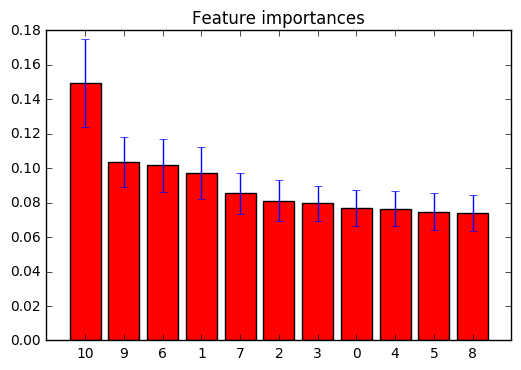

In [39]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]), features[indices[f]])

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Percentage of label")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

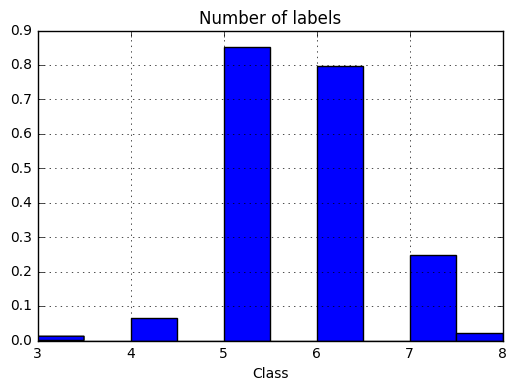

In [57]:
import matplotlib.pyplot as plt
plt.figure()
plt.title("Number of labels")
plt.xlabel("Class")
y.hist(normed=True)